# 0. Install Dependencies

In [5]:
!pip install tensorflow==2.8.0
!pip install gym
!pip install keras==2.8.0
!pip install keras-rl2==1.0.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 822.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [6]:
from gym import Env
from gym.spaces import Discrete, Box
import random
import numpy as np

In [7]:
liste_shower_length = []
liste_state = []
class ShowerEnv(Env):

  def __init__(self):
    # initialisation
    # 3 actions   0,1,2
    self.action_space = Discrete(3)
    #intervale de température qui contient les valeurs de 0 à 100
    self.observation_space = Box(low=np.array([0]), high=np.array([100]))
    # Température initiale
    self.state = 38+random.randint(-3,3)
    # La longueur de la douche
    self.shower_length = 60

  def step(self,action):
    global liste_shower_length,liste_state
    liste_shower_length.append(self.shower_length)
    liste_state.append(self.state)
    # comment l'environnement change
    self.state += action -1
    self.shower_length -= 1
    # récompense
    if self.state >=37 and self.state<=39:
      reward =1
    else:
      reward =-1
    #vériication de la longueur de la douche
    if self.shower_length <= 0:
      done = True
    else:
      done =False
    # nouvel état
    self.state += random.randint(-1,1)
    info = {}

    return self.state, reward, done, info

  def render(self):
    pass

  def reset(self):
    global liste_shower_length,liste_state
    self.state = 38+random.randint(-3,3)
    self.shower_length = 60
    liste_shower_length = []
    liste_state = []
    return self.state


In [8]:
env = ShowerEnv() # New environment

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [63]:
episodes = 60 # 10 episode to run
liste_episode= []
liste_states= []
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    liste_episode.append(episode)
    liste_states.append(state)

    while not done:
        # env.render() we have nothing to render
        action = env.action_space.sample() #random choose 1
        n_state, reward, done, info = env.step(action)
        score+=reward

    print('Episode:{} Score:{} state:{}'.format(episode, score, state))


Episode:1 Score:-28 state:35
Episode:2 Score:-60 state:41
Episode:3 Score:-16 state:37
Episode:4 Score:-50 state:36
Episode:5 Score:-22 state:38
Episode:6 Score:-36 state:35
Episode:7 Score:-42 state:39
Episode:8 Score:-8 state:40
Episode:9 Score:-28 state:41
Episode:10 Score:-38 state:38
Episode:11 Score:-48 state:40
Episode:12 Score:-36 state:39
Episode:13 Score:-36 state:35
Episode:14 Score:-30 state:41
Episode:15 Score:-28 state:38
Episode:16 Score:-16 state:36
Episode:17 Score:-28 state:37
Episode:18 Score:-18 state:36
Episode:19 Score:-50 state:41
Episode:20 Score:-44 state:38
Episode:21 Score:-28 state:41
Episode:22 Score:30 state:37
Episode:23 Score:-2 state:40
Episode:24 Score:-18 state:36
Episode:25 Score:-54 state:38
Episode:26 Score:-40 state:40
Episode:27 Score:-56 state:41
Episode:28 Score:-52 state:38
Episode:29 Score:-46 state:41
Episode:30 Score:-54 state:38
Episode:31 Score:0 state:40
Episode:32 Score:-54 state:35
Episode:33 Score:0 state:38
Episode:34 Score:-58 state

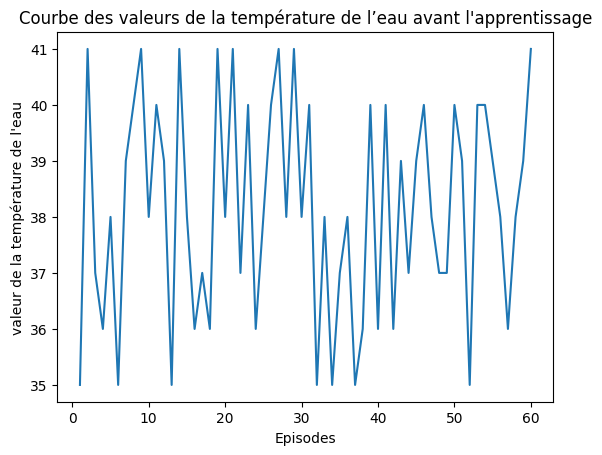

In [64]:
import matplotlib.pyplot as plt


# Création du graphe

plt.plot(liste_episode, liste_states)

# Inversez l'axe x

# Ajouter des étiquettes et un titre
plt.xlabel('Episodes')
plt.ylabel("valeur de la température de l'eau")
plt.title("Courbe des valeurs de la température de l’eau avant l'apprentissage")

# Afficher le graphe
plt.show()

In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [13]:
states =env.observation_space.shape
actions = env.action_space.n

In [15]:
def build_model(states, actions):
    b_model = Sequential()
    b_model.add(Dense(24, activation='relu',input_shape = states))
    b_model.add(Dense(24, activation='relu'))
    b_model.add(Dense(actions, activation='linear'))
    return b_model

In [16]:
model = build_model(states, actions)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                48        
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 3)                 75        
                                                                 
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [39]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [40]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=200000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [41]:
# Run this if needed
del model
model = build_model(states, actions)

In [42]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=200000, visualize=False, verbose=1)

Training for 200000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 108s 11ms/step - reward: -0.6528
166 episodes - episode_reward: -39.133 [-60.000, 10.000] - loss: 1.472 - mae: 6.681 - mean_q: -7.806

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 111s 11ms/step - reward: -0.6200
167 episodes - episode_reward: -37.210 [-60.000, 22.000] - loss: 2.598 - mae: 11.760 - mean_q: -16.917

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 110s 11ms/step - reward: -0.6460
167 episodes - episode_reward: -38.790 [-60.000, 34.000] - loss: 3.289 - mae: 13.885 - mean_q: -20.117

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 116s 12ms/step - reward: -0.6300
166 episodes - episode_reward: -37.916 [-60.000, 24.000] - loss: 3.439 - mae: 13.971 - mean_q: -20.236

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 119s 12ms/step - r

In [43]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 60.000, steps: 60
Episode 2: reward: 54.000, steps: 60
Episode 3: reward: 60.000, steps: 60
Episode 4: reward: 60.000, steps: 60
Episode 5: reward: 60.000, steps: 60
Episode 6: reward: 60.000, steps: 60
Episode 7: reward: 60.000, steps: 60
Episode 8: reward: 58.000, steps: 60
Episode 9: reward: 60.000, steps: 60
Episode 10: reward: 60.000, steps: 60
Episode 11: reward: 60.000, steps: 60
Episode 12: reward: 54.000, steps: 60
Episode 13: reward: 60.000, steps: 60
Episode 14: reward: 60.000, steps: 60
Episode 15: reward: 58.000, steps: 60
Episode 16: reward: 60.000, steps: 60
Episode 17: reward: 60.000, steps: 60
Episode 18: reward: 58.000, steps: 60
Episode 19: reward: 60.000, steps: 60
Episode 20: reward: 60.000, steps: 60
Episode 21: reward: 60.000, steps: 60
Episode 22: reward: 60.000, steps: 60
Episode 23: reward: 56.000, steps: 60
Episode 24: reward: 60.000, steps: 60
Episode 25: reward: 60.000, steps: 60
Episode 26: reward: 60.000, st

In [44]:
# test it from our trained model
_ = dqn.test(env, nb_episodes=15, visualize=False)

Testing for 15 episodes ...
Episode 1: reward: 56.000, steps: 60
Episode 2: reward: 60.000, steps: 60
Episode 3: reward: 54.000, steps: 60
Episode 4: reward: 56.000, steps: 60
Episode 5: reward: 60.000, steps: 60
Episode 6: reward: 58.000, steps: 60
Episode 7: reward: 60.000, steps: 60
Episode 8: reward: 60.000, steps: 60
Episode 9: reward: 60.000, steps: 60
Episode 10: reward: 58.000, steps: 60
Episode 11: reward: 58.000, steps: 60
Episode 12: reward: 58.000, steps: 60
Episode 13: reward: 60.000, steps: 60
Episode 14: reward: 60.000, steps: 60
Episode 15: reward: 60.000, steps: 60


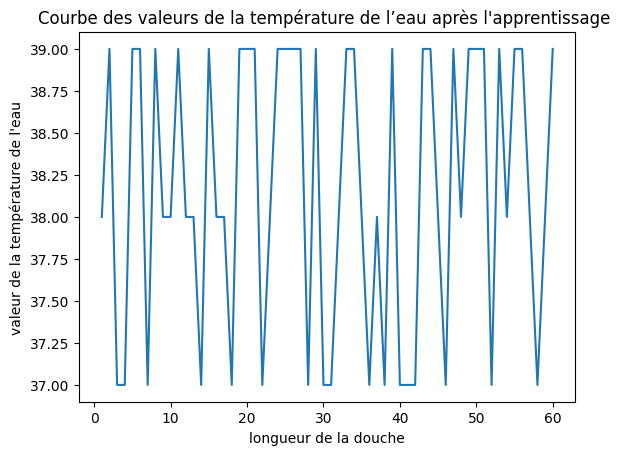

In [48]:
from sys import platlibdir
import matplotlib.pyplot as plt

# Création du graphe

plt.plot(liste_shower_length, liste_state)

# Ajouter des étiquettes et un titre
plt.xlabel('longueur de la douche')
plt.ylabel("valeur de la température de l'eau")
plt.title("Courbe des valeurs de la température de l’eau après l'apprentissage ")

# Afficher le graphe
plt.show()